# Data Pretreatment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import datasets

In [2]:
df_books = pd.read_csv("books.csv")
df_booktags = pd.read_csv("book_tags.csv")
df_tags = pd.read_csv("tags.csv")
df_ratings = pd.read_csv("ratings.csv")

### 1. ratings
Overwritten the books_id with goodread_books_id in ratings.csv for merging purposes with book_tags.csv

In [3]:
book_id_map = df_books.set_index("book_id")["goodreads_book_id"].to_dict()
df_ratings["book_id"] = df_ratings["book_id"].map(book_id_map)
df_ratings.head()

,user_id,book_id,rating
0,1,1232,5
1,2,231,4
2,2,4865,5
3,2,4887,5
4,2,998,3


In [4]:
#df_ratings.to_csv("ratings_autorec.csv", index=False)

### 2.books

In [5]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
df_books = df_books.drop(columns=['book_id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'image_url', 'small_image_url'], errors='ignore')

In [7]:
print(df_books.dtypes)
df_books['original_title'] = df_books['original_title'].fillna(df_books['title']) # Fill NaN original titles with titles
#print(df_books.isna().sum())
#df_books.head()

goodreads_book_id              int64
books_count                    int64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
dtype: object


added column tag name in booktags

In [8]:
df_tags = df_tags[df_tags['tag_name'].notna() & (df_tags['tag_name'] != '') & (df_tags['tag_name'] != '-')]
df_booktags['tag_name'] = df_booktags['tag_id'].map(df_tags.set_index('tag_id')['tag_name'])

#df_booktags.head()

add list of tags for each books

In [9]:
def get_tags_for_book(book_id):
    tags = df_booktags[df_booktags['goodreads_book_id'] == book_id]['tag_name'].tolist()
    return tags

df_books['tags_list'] = df_books['goodreads_book_id'].apply(get_tags_for_book)

# add authors, original_title, and title to tags_list to improve clustering 
df_books['tags_list'] = df_books.apply(
    lambda row: row['tags_list'] + [row['authors'], row['original_title'], row['title']],
    axis=1
)
# add language_code if not na
df_books['tags_list'] = df_books.apply(
    lambda row: row['tags_list'] + [row['language_code']] if pd.notna(row['language_code']) else row['tags_list'],
    axis=1
)

add string tag list to tha dataframe

In [10]:
df_books['tags_list'] = df_books['tags_list'].apply(
    lambda x: x if isinstance(x, list) else []
)
df_books['tags_string'] = df_books['tags_list'].apply(lambda tags: ' '.join(map(str, tags)))

Numerical and categorical columns pretreatment

In [11]:
print("exemple of string:   ", df_books['tags_string'][177])
df_books.head()

exemple of string:    to-read currently-reading favorites classics fiction feminism literary-fiction owned contemporary non-fiction books-i-own feminist 1001 kindle re-read classics-to-read classic favourites my-library 1001-books-to-read-before-you-die classic-literature all-time-favorites rory-gilmore-challenge read-in-2015 literary favorite-books general-fiction mental-health school my-books mental-illness i-own to-re-read realistic-fiction nonfiction ebook suicide favorite drama read-in-2016 new-york read-in-english to-read-classics read-in-2013 audiobooks read-in-2017 gilmore-girls autobiography own-it classic-lit rory-gilmore-reading-challenge usa novels faves owned-books to-read-fiction book-club to-reread must-read ebooks college reread literature abandoned historical-fiction unfinished audio bookclub women-authors contemporary-fiction 50-books-to-read-before-you-die lit 5-stars 2016-reads adult psych 2015-reading-challenge need-to-buy read-again read-in-2011 my-favorites read-

,goodreads_book_id,books_count,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,tags_list,tags_string
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,"[favorites, currently-reading, young-adult, fi...",favorites currently-reading young-adult fictio...
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"[to-read, favorites, fantasy, currently-readin...",to-read favorites fantasy currently-reading yo...
2,41865,226,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,"[young-adult, fantasy, favorites, vampires, ya...",young-adult fantasy favorites vampires ya fict...
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,"[classics, favorites, to-read, classic, histor...",classics favorites to-read classic historical-...
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,"[classics, favorites, fiction, classic, books-...",classics favorites fiction classic books-i-own...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_books['tags_string'])

# Clustering with k-Means

In [13]:
from sklearn.cluster import KMeans

k = 15
model = KMeans(n_clusters=k, random_state=33, max_iter=1000, n_init=10)
df_books['cluster'] = model.fit_predict(X)

In [14]:
cluster_counts = df_books['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} elements")

Cluster 0: 530 elements
Cluster 1: 1082 elements
Cluster 2: 1059 elements
Cluster 3: 687 elements
Cluster 4: 686 elements
Cluster 5: 1214 elements
Cluster 6: 410 elements
Cluster 7: 192 elements
Cluster 8: 292 elements
Cluster 9: 737 elements
Cluster 10: 513 elements
Cluster 11: 182 elements
Cluster 12: 529 elements
Cluster 13: 405 elements
Cluster 14: 1482 elements


In [15]:
from collections import Counter

def print_top_tags_per_cluster(df, top_n=20):

    for cluster_id in sorted(df['cluster'].unique()):
        tags = df[df['cluster'] == cluster_id]['tags_list'].explode()
        tag_counts = Counter(tags)
        most_common = tag_counts.most_common(top_n)
        print(f"\nCluster {cluster_id}:")
        for tag, count in most_common:
            print(f"  {tag}: {count}")

print_top_tags_per_cluster(df_books, top_n=10)


Cluster 0:
  non-fiction: 529
  biography: 528
  to-read: 528
  nonfiction: 527
  biography-memoir: 527
  owned: 523
  favorites: 523
  books-i-own: 522
  library: 517
  currently-reading: 516

Cluster 1:
  to-read: 1081
  fantasy: 1079
  favorites: 1079
  fiction: 1079
  sci-fi-fantasy: 1078
  owned: 1073
  books-i-own: 1067
  currently-reading: 1066
  library: 1059
  fantasy-sci-fi: 1048

Cluster 2:
  to-read: 1058
  fiction: 1054
  favorites: 1049
  owned: 1047
  books-i-own: 1046
  adult: 1034
  adult-fiction: 1032
  library: 1030
  currently-reading: 1023
  book-club: 1010

Cluster 3:
  to-read: 686
  owned: 683
  favorites: 678
  fiction: 678
  ya: 677
  books-i-own: 677
  young-adult: 676
  library: 671
  teen: 666
  owned-books: 662

Cluster 4:
  to-read: 685
  fiction: 678
  childrens: 677
  owned: 675
  books-i-own: 674
  children: 674
  currently-reading: 673
  young-adult: 673
  favorites: 672
  kids: 668

Cluster 5:
  to-read: 1212
  mystery: 1211
  fiction: 1207
  owned:

# Clustering with DBSCAN

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

svd = TruncatedSVD(n_components=100, random_state=33)
X_reduced = svd.fit_transform(X)
X_scaled = StandardScaler(with_mean=False).fit_transform(X_reduced)

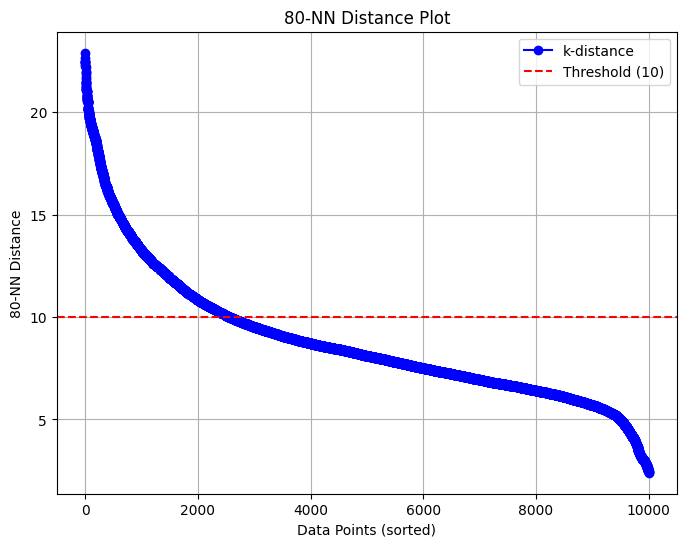

In [17]:
from sklearn.neighbors import NearestNeighbors

k = 80
eps = 10
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k - 1])[::-1]

plt.figure(figsize=(8, 6))
plt.plot(k_distances, marker='o', linestyle='-', color='blue', label='k-distance')
plt.axhline(y=eps, color='red', linestyle='--', label=f'Threshold ({eps})')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-NN Distance')
plt.title(f'{k}-NN Distance Plot')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=eps, min_samples=k, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)
df_books['dbscan_cluster'] = labels

In [19]:
df_books.head()

cluster_counts = df_books['dbscan_cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} elements")

Cluster -1: 761 elements
Cluster 0: 9239 elements
